# Data & Env Initialization

In [1]:
import zipfile
from os import path
import numpy as np # linear algebra
from tqdm import tqdm
import matplotlib.pyplot as plt

zip_file = "Lamp303.zip"
data_path = "Lamp303/"

input_indice_path = data_path + "input_indices_{}.npy"
input_data_path = data_path + "input_data_{}.npy"
target_path = data_path + "output_indices_{}.npy"
if not path.exists(data_path):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(".")

# Constants

In [2]:
THETA = [2.5, -1.25, 0.] # the theta of the problem describle in the paper
N_CONFIGURATIONS = 4262 # number of configuration of the problem
H, W = 128, 256 # the window size

CAMERA = np.array([[2304.5479, 0,  1686.2379], # the camera matrix
                          [0, 2305.8757, 1354.9849],
                          [0, 0, 1]], dtype=np.float32)

# Data Viz & Utils

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader

In [4]:
class Lamp303Dataset(Dataset):
    """Car dataset."""

    def __init__(self):
        super(Lamp303Dataset,self).__init__()

    def __len__(self):
        return N_CONFIGURATIONS

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        # PART 2
        indice_np = np.load(input_indice_path.format(idx))
        input_np = np.load(input_data_path.format(idx))
        target_np = np.load(target_path.format(idx))
        
        input_2Drepr = np.zeros([H, W, 3], dtype='float16')
        input_2Drepr[indice_np[:,0],indice_np[:,1],:] = input_np
        
        target_2Drepr = np.zeros([H, W, 1], dtype='float16')
        target_2Drepr[target_np[:,0],target_np[:,1],:] = 1.
        
        input_2Drepr = np.rollaxis(input_2Drepr, 2, 0)
        input_2Drepr = torch.from_numpy(input_2Drepr).float()
        
        target_2Drepr = np.rollaxis(target_2Drepr, 2, 0)
        target_2Drepr = torch.from_numpy(target_2Drepr).float()
        
        return [input_2Drepr, target_2Drepr]

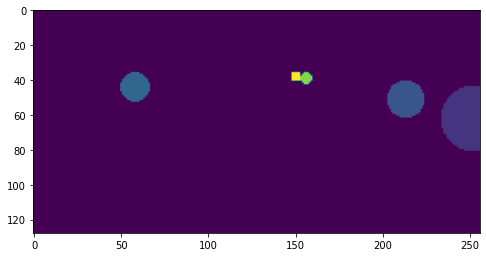

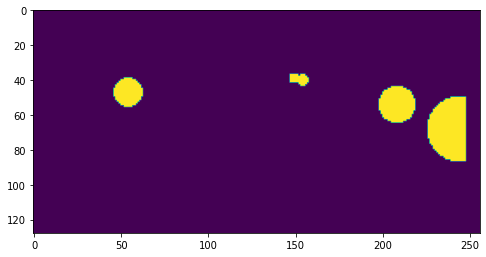

In [5]:
dataset = Lamp303Dataset()
input_2Drepr, target_2Drepr = dataset[0]

plt.figure(figsize=(8,8))
plt.imshow(input_2Drepr.permute(1,2,0).numpy()[:,:,-1]/350.)
plt.show()

plt.figure(figsize=(8,8))
plt.imshow((target_2Drepr.permute(1,2,0).numpy()[:,:,-1]).squeeze())
plt.show()